In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
plt.style.use(['science'])
import matplotlib as mpl
mpl.rcParams['xtick.labelsize'] = "medium"
mpl.rcParams['ytick.labelsize'] = "medium"
mpl.rcParams['legend.fontsize'] = "large"
mpl.rcParams['legend.frameon'] = True
mpl.rcParams['legend.framealpha'] = 1
mpl.rcParams['lines.linewidth'] = 1.5

In [2]:
def smoothing(i_list):
    i_array = np.array(i_list)
    di = i_array[1:] - i_array[:-1]
    t=np.arange(len(di))*0.5
    eta = np.zeros_like(t)
    eta[1:] = (t[1:]-50)/t[1:]/10
    eta[t<50] = 0
    return [0] + np.cumsum(di* np.exp(-eta * t)).tolist()

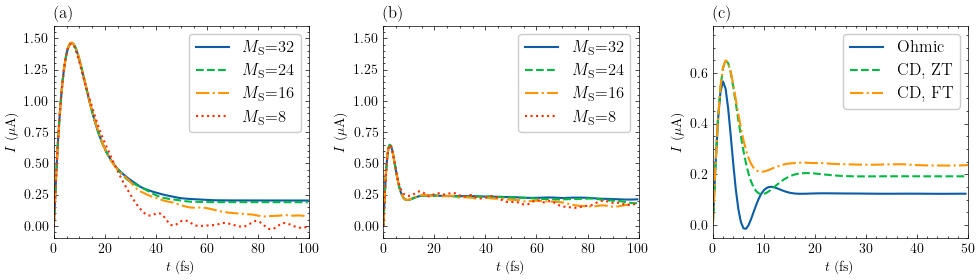

In [3]:
fig = plt.figure(figsize=(10, 3))
axis = fig.subplots(1, 3)

plt.sca(axis[0])

fname_list = [
    (f"./more_modes2/Ms{Ms}_i0_temperature300.log", r"$M_{\rm{S}}$" + f"={Ms}") for Ms in [32, 24, 16, 8]
]
style_list = ["-", "--", "-.", ":"]
for i, (fname, label) in enumerate(fname_list):
    with open(fname) as fin:
        text = fin.read()
    lines = text.split("\n")
    last = lines[-2]
    i_list = list(map(float, last.split("] [")[1][:-1].split(", ")))
    if "Ms24" in fname or "Ms32" in fname:
        i_list = smoothing(i_list)
    x = np.arange(len(i_list)) * 0.5
    plt.plot(x, i_list, label=label, linestyle=style_list[i])
plt.title("(a)", loc="left")
plt.legend()
plt.xlim(0, 100)
plt.ylim(-0.1, 1.6)
plt.xlabel("$t$ (fs)")
plt.ylabel("$I$ ($\mu$A)")

plt.sca(axis[1])

fname_list = [
    (f"./more_modes2/Ms{Ms}_i1_temperature300.log", r"$M_{\rm{S}}$" + f"={Ms}") for Ms in [32, 24, 16, 8]
]
for i, (fname, label) in enumerate(fname_list):
    with open(fname) as fin:
        text = fin.read()
    lines = text.split("\n")
    last = lines[-2]
    i_list = list(map(float, last.split("] [")[1][:-1].split(", ")))
    x = np.arange(len(i_list)) * 0.5
    plt.plot(x, i_list, label=label, linestyle=style_list[i])
plt.title("(b)", loc="left")
plt.legend()
plt.xlim(0, 100)
plt.ylim(-0.1, 1.6)
plt.xlabel("$t$ (fs)")
plt.ylabel("$I$ ($\mu$A)")

plt.sca(axis[2])

fname_list = [
    ("./compare/junction352.out", "Ohmic"),
    ("./compare/junction5_beta050_limit10.out", "CD, ZT"),
    ("./compare/Ms32_i1_temperature300.log", "CD, FT")
]
for i, (fname, label) in enumerate(fname_list):
    with open(fname) as fin:
        text = fin.read()
    lines = text.split("\n")
    last = lines[-2]
    i_list = list(map(float, last.split("] [")[1][:-1].split(", ")))
    x = np.arange(len(i_list)) * 0.5
    plt.plot(x, i_list, label=label, linestyle=style_list[i])
plt.title("(c)", loc="left")
plt.legend()
plt.xlim(0, 50)
plt.xlabel("$t$ (fs)")
plt.ylabel("$I$ ($\mu$A)")
plt.tight_layout()

plt.savefig("transport.pdf")